## Part a: setup neccessary component

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time 

old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

# define helper function
def softmax( x ):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

def cross_entropy( X, y ):    
    p = softmax(X)    
    lglk = -np.log(p)
    loss = np.sum( lglk*y ) 
    return loss


In [23]:
from tensorflow.examples.tutorials.mnist import input_data
#get mnist data, with one_hot encoding
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
#suppress warnings
tf.logging.set_verbosity(old_v)

#learning rate
lr = .005
iters  =5000
#batch_size = 128 

#network parameters
n_hidden_1 = 100 
num_input = 784
num_classes = 10


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## part b, c, d: forward, backward propagation and gradient of cost function 

In [16]:
def myNN( batch_size = 16 ):
    
    start_time = time.time()
    # initial weights and bias 
    W1 =np.random.rand( n_hidden_1, num_input )
    b1 =np.random.rand( n_hidden_1 )

    Wo =np.random.rand( num_classes,  n_hidden_1 )
    bo =np.random.rand( num_classes)
    
    Wo_track = np.zeros( iters  )
    bo_track = np.zeros( iters  )
    W1_track = np.zeros( iters  )
    b1_track = np.zeros( iters  )
    loss_track = np.zeros(iters )
    acc_track = np.zeros(iters )
    
    for i in range(1, iters):    
    
        loss = 0 
        dWo = 0
        dbo = 0
        db1 = 0 
        dW1 = 0 
        acc = 0 
        # for each sample 
        X_batch, y_batch = mnist.train.next_batch(batch_size)

        for s in range(batch_size):
            X = X_batch[s ]
            y = y_batch[s ]
            # feed forward 
            Z1 = W1.dot(X) + b1
            A1 = np.maximum(Z1, 0)
            Zo = np.matmul(Wo, A1) + bo
            Ao = softmax(Zo)

            lglk = -np.log(Ao + 1e-20)
            loss += np.sum( lglk*y )
            acc += 1.0*( np.argmax(Ao) == np.argmax(y) )

            # backward propagation 
            dWo += (Ao - y).reshape( num_classes, 1 ).dot( A1.reshape(1, n_hidden_1 ) )
            dbo += (Ao - y)

            db1 +=  (Ao - y).dot( Wo ).dot(  np.diag(  np.sign(A1)  ) )
            dW1 += db1.reshape( n_hidden_1, 1 ).dot( X.reshape(1, num_input ) )


        dWo = 1.0*dWo/batch_size 
        dbo = 1.0*dbo/batch_size 
        db1 = 1.0*db1/batch_size 
        dW1 = 1.0*dW1/batch_size 
        loss = 1.0*loss/batch_size
        acc  = 1.0*acc/batch_size

        W1_track[i] =  np.abs( dW1).sum()  
        b1_track[i] =  np.abs( db1).sum()  
        Wo_track[i] =  np.abs( dWo).sum()  
        bo_track[i] =  np.abs( dbo).sum()  
        loss_track[i] = loss
        acc_track[i] = acc

       # update parameter     
        Wo -= lr*dWo
        bo -= lr*dbo
        W1 -= lr*dW1
        b1 -= lr*db1

        if i%1000 == 0:
            print("\n .. done iter:", i, "loss", loss, "..acc", acc)
        
#    plt.plot(Wo_track, color="green")
#    plt.plot(bo_track,color="orange")
#    plt.plot(W1_track , color="black")
#    plt.plot(b1_track, color="blue")

    # plot loss function 
    plt.subplot(121)
    plt.plot(loss_track)
    plt.title('loss track -batch size:'+ str( batch_size) )
    plt.subplot(122)
    plt.plot(acc_track)
    plt.title('accuracy track -batch size:' + str( batch_size) )
    
    # predict accurary 
    X_test = mnist.test.images
    y_test = mnist.test.labels
    num_test = mnist.test.num_examples #10,000
    loss = 0
    acc = 0 

    for s in range(num_test):
        X = X_test[s ]
        y = y_test[s ]
        # feed forward 
        Z1 = W1.dot(X) + b1
        A1 = np.maximum(Z1, 0)
        Zo = np.matmul(Wo, A1) + bo
        Ao = softmax(Zo)

        lglk = -np.log(Ao)
        loss += np.sum( lglk*y )
        acc += 1.0*( np.argmax(Ao) == np.argmax(y) )

    loss = loss/num_test
    acc  = acc/num_test
    print("\n prediction loss", loss, "..prediction acc", acc)

    print("...running time %s seconds ..." % np.round( time.time() - start_time) )
    
    return None 


 .. done iter: 1000 loss 3.5728730500262778 ..acc 0.6875

 .. done iter: 2000 loss 2.8163683896431384 ..acc 0.8125

 .. done iter: 3000 loss 1.167153177070223 ..acc 0.875

 .. done iter: 4000 loss 2.7504331179737824 ..acc 0.6875

 .. loss 1.0950569703679078 ..acc 0.8504
...running time 31.0 seconds ...


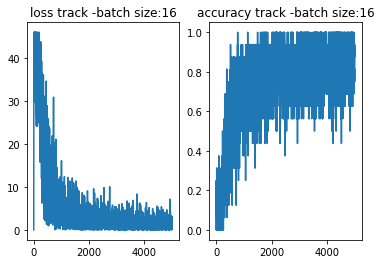

In [17]:
myNN(batch_size=16)


 .. done iter: 1000 loss 1.2283911081189494 ..acc 0.765625

 .. done iter: 2000 loss 0.39710012755951973 ..acc 0.890625

 .. done iter: 3000 loss 0.7776574013965015 ..acc 0.78125

 .. done iter: 4000 loss 1.126439276293691 ..acc 0.796875

 .. loss 0.5245900542070161 ..acc 0.8604
...running time 117.0 seconds ...


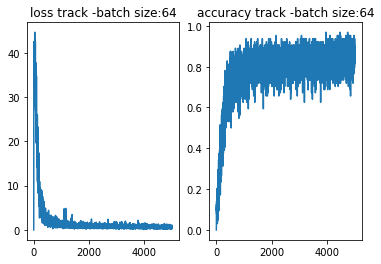

In [18]:
myNN(batch_size=64)


 .. done iter: 1000 loss 0.9250205519312282 ..acc 0.7578125

 .. done iter: 2000 loss 0.725948648323138 ..acc 0.79296875

 .. done iter: 3000 loss 0.5930752326763754 ..acc 0.828125

 .. done iter: 4000 loss 0.48072776356293634 ..acc 0.85546875

 .. loss 0.43553160370210964 ..acc 0.871
...running time 459.0 seconds ...


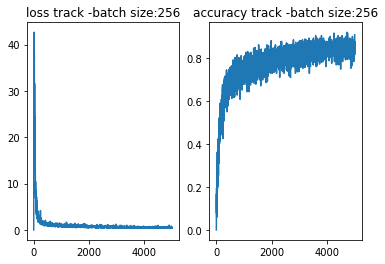

In [19]:
myNN(batch_size=256)


 .. done iter: 1000 loss 1.908983949359744 ..acc 0.3466796875

 .. done iter: 2000 loss 1.68953325497434 ..acc 0.4111328125

 .. done iter: 3000 loss 1.206335922614698 ..acc 0.619140625

 .. done iter: 4000 loss 1.1581237666957411 ..acc 0.61328125

 .. loss 1.121831910093305 ..acc 0.6109
...running time 2188.0 seconds ...


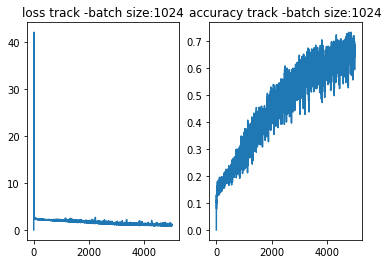

In [20]:
myNN(batch_size=1024)

## part f: Adam 


In [25]:
def myNN_Adam(batch_size, beta1=0.9, beta2=0.99):
    start_time = time.time()
    # initial weights and bias 
    W1 =np.random.rand( n_hidden_1, num_input )
    b1 =np.random.rand( n_hidden_1 )

    Wo =np.random.rand( num_classes,  n_hidden_1 )
    bo =np.random.rand( num_classes)

    Wo_track = np.zeros( iters  )
    bo_track = np.zeros( iters  )
    W1_track = np.zeros( iters  )
    b1_track = np.zeros( iters  )
    loss_track = np.zeros(iters )
    acc_track = np.zeros(iters )

    eps = 1e-8

    mok= np.zeros( (num_classes, n_hidden_1) )
    vok = np.zeros( (num_classes, n_hidden_1) ) 

    m1k= np.zeros( ( n_hidden_1, num_input) )
    v1k = np.zeros( (n_hidden_1, num_input ) ) 

    mbok= np.zeros( (num_classes) )
    vbok = np.zeros( (num_classes) ) 

    mb1k= np.zeros( ( n_hidden_1) )
    vb1k = np.zeros( (n_hidden_1 ) ) 
    
    
    for i in range(1, iters):    

        loss = 0 
        dWo = 0
        dbo = 0
        db1 = 0 
        dW1 = 0 
        acc = 0 
        # for each sample 
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        for s in range(batch_size):
            X = X_batch[s ]
            y = y_batch[s ]
            # feed forward 
            Z1 = W1.dot(X) + b1
            A1 = np.maximum(Z1, 0)
            Zo = np.matmul(Wo, A1) + bo
            Ao = softmax(Zo)

            lglk = -np.log(Ao + 1e-20)
            loss += np.sum( lglk*y )
            acc += 1.0*( np.argmax(Ao) == np.argmax(y) )

            # backward propagation 
            dWo += (Ao - y).reshape( num_classes, 1 ).dot( A1.reshape(1, n_hidden_1 ) )
            dbo += (Ao - y)

            db1 +=  (Ao - y).dot( Wo ).dot(  np.diag(  np.sign(A1)  ) )
            dW1 += db1.reshape( n_hidden_1, 1 ).dot( X.reshape(1, num_input ) )


        dWo = 1.0*dWo/batch_size 
        dbo = 1.0*dbo/batch_size 
        db1 = 1.0*db1/batch_size 
        dW1 = 1.0*dW1/batch_size 
        loss = 1.0*loss/batch_size
        acc  = 1.0*acc/batch_size

        W1_track[i] =  np.abs( dW1).sum()  
        b1_track[i] =  np.abs( db1).sum()  
        Wo_track[i] =  np.abs( dWo).sum()  
        bo_track[i] =  np.abs( dbo).sum()  
        loss_track[i] = loss
        acc_track[i] = acc

        mok =(  beta1*mok + (1-beta1)*dWo )
        vok =( beta2*vok + (1-beta2)*np.power( dWo , 2) )
        Wo = Wo - lr*np.divide( mok/(1- np.power(beta1, i)) , (  np.sqrt(vok/(1- np.power(beta2, i))) +eps  ) )

        m1k =(  beta1*m1k + (1-beta1)*dW1 )
        v1k =( beta2*v1k + (1-beta2)*np.power( dW1 , 2) )
        W1 = W1 - lr*np.divide( m1k/(1- np.power(beta1, i)), (  np.sqrt(v1k/(1- np.power(beta2, i))) +eps  ) )

        mbok =(  beta1*mbok + (1-beta1)*dbo )
        vbok =( beta2*vbok + (1-beta2)*np.power( dbo , 2) )
        bo = bo - lr*np.divide( mbok/(1- np.power(beta1, i)), (  np.sqrt(vbok/(1- np.power(beta2, i))) +eps  ) )

        mb1k =(  beta1*mb1k + (1-beta1)*db1 )
        vb1k =( beta2*vb1k + (1-beta2)*np.power( db1 , 2) )
        b1 = b1 - lr*np.divide( mb1k/(1- np.power(beta1, i)), (  np.sqrt(vb1k/(1- np.power(beta2, i))) +eps  ) )

        if i%1000 == 0:
            print("\n .. done iter:", i, "loss", loss, "..acc", acc)


    # plot loss function 
    plt.subplot(121)
    plt.plot(loss_track)
    plt.title('loss track -batch size:'+ str( batch_size) )
    plt.subplot(122)
    plt.plot(acc_track)
    plt.title('accuracy track -batch size:' + str( batch_size) )

    # predict accurary 
    X_test = mnist.test.images
    y_test = mnist.test.labels
    num_test = mnist.test.num_examples #10,000
    loss = 0
    acc = 0 

    for s in range(num_test):
        X = X_test[s ]
        y = y_test[s ]
        # feed forward 
        Z1 = W1.dot(X) + b1
        A1 = np.maximum(Z1, 0)
        Zo = np.matmul(Wo, A1) + bo
        Ao = softmax(Zo)

        lglk = -np.log(Ao)
        loss += np.sum( lglk*y )
        acc += 1.0*( np.argmax(Ao) == np.argmax(y) )

    loss = loss/num_test
    acc  = acc/num_test
    print("\n .. prediction loss", loss, "..prediction acc", acc)

    print("...running time %s seconds ..." % np.round( time.time() - start_time) )

    return None 


 .. done iter: 1000 loss 1.736507296889424 ..acc 0.75

 .. done iter: 2000 loss 6.1473757885522415 ..acc 0.625

 .. done iter: 3000 loss 0.49290882667319386 ..acc 0.9375

 .. done iter: 4000 loss 0.4911361425321312 ..acc 0.875

 .. prediction loss 1.579680873871091 ..prediction acc 0.8449
...running time 59.0 seconds ...


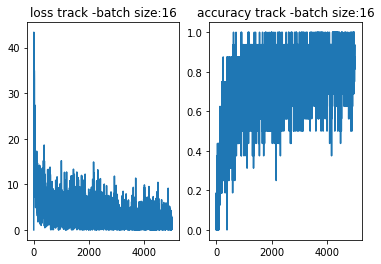

In [27]:
myNN_Adam(batch_size=16)



 .. done iter: 1000 loss 1.8002205109914637 ..acc 0.703125

 .. done iter: 2000 loss 0.8113222739132955 ..acc 0.8046875

 .. done iter: 3000 loss 0.798290515691984 ..acc 0.8125

 .. done iter: 4000 loss 1.003329907977869 ..acc 0.84375

 .. prediction loss 0.658575937148157 ..prediction acc 0.8623
...running time 253.0 seconds ...


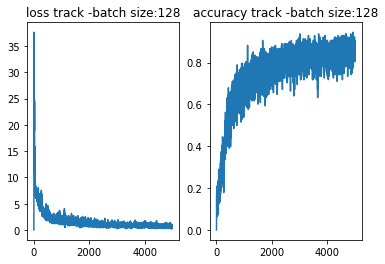

In [28]:
myNN_Adam(batch_size=128)



 .. done iter: 1000 loss 1.3770212055714728 ..acc 0.6484375

 .. done iter: 2000 loss 0.9248664186038477 ..acc 0.80078125

 .. done iter: 3000 loss 0.5377506663731104 ..acc 0.859375

 .. done iter: 4000 loss 0.728036016094367 ..acc 0.84765625

 .. prediction loss 0.5656485604072066 ..prediction acc 0.8629
...running time 423.0 seconds ...


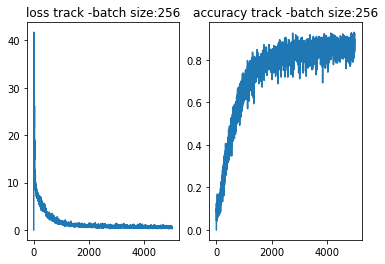

In [29]:
myNN_Adam(batch_size=256)



 .. done iter: 1000 loss 1.4681429514518647 ..acc 0.6787109375

 .. done iter: 2000 loss 0.7402866941219348 ..acc 0.810546875

 .. done iter: 3000 loss 0.6388560212743907 ..acc 0.828125

 .. done iter: 4000 loss 0.5915144064641079 ..acc 0.837890625

 .. prediction loss 0.5222989441649264 ..prediction acc 0.8504
...running time 2075.0 seconds ...


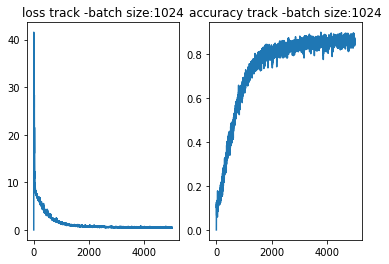

In [30]:
myNN_Adam(batch_size=1024)

## part g: implement in Tensorflow

In [41]:
def tf_NN(batch_size):
    acc_track = []
    loss_track = []
    start_time = time.time()
    tf.reset_default_graph()

    #tf graph input
    X = tf.placeholder(tf.float32,[None,num_input],name='X')
    Y = tf.placeholder(tf.float32,[None,num_classes],name='Y')

    #Layers weight & bias
    weights = {

        'W1': tf.Variable(tf.truncated_normal([num_input, n_hidden_1], stddev=0.1 ),name='W1'),
        'Wout': tf.Variable(tf.truncated_normal([n_hidden_1, num_classes]),name='Wout')
    }

    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden_1]),name='b1'),
        'bout': tf.Variable(tf.constant(0.1, shape=[num_classes]),name='bout')
    }

    #define a neural net model
    def neural_net(x):
        layer_1_out = tf.nn.relu(  tf.add(tf.matmul(x,weights['W1']),biases['b1']) )
        out = ( tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])  )

        return out

    #predicted labels
    logits = neural_net(X)

    #define loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y),name='loss')

    #define optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
    train_op = optimizer.minimize(loss)

    #compare the predicted labels with true labels
    correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))  

    #compute the accuracy by taking average
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

    #Initialize the variables
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        for i in range(iters):
            #fetch batch
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
            
            acc = sess.run(accuracy,feed_dict={X:batch_x, Y:batch_y})
            l = sess.run(loss,feed_dict={X:batch_x, Y:batch_y})
            acc_track.append(acc)
            loss_track.append(l)
            if i % 1000 ==0:
                print("step "+str(i)+", Accuracy= {:.3f}".format(acc))

        print("Training finished!")

        print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
        print("...running time %s seconds ..." % np.round( time.time() - start_time) )
        
    # plot loss function 
    plt.subplot(121)
    plt.plot(loss_track)
    plt.title('loss track -batch size:'+ str( batch_size) )
    plt.subplot(122)
    plt.plot(acc_track)
    plt.title('accuracy track -batch size:' + str( batch_size) )



step 0, Accuracy= 0.312
step 1000, Accuracy= 1.000
step 2000, Accuracy= 0.812
step 3000, Accuracy= 1.000
step 4000, Accuracy= 0.938
Training finished!
Testing ACcuracy: 0.9319
...running time 13.0 seconds ...


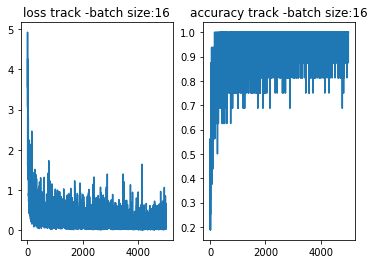

In [42]:
tf_NN(batch_size=16)

step 0, Accuracy= 0.148
step 1000, Accuracy= 0.859
step 2000, Accuracy= 0.906
step 3000, Accuracy= 0.906
step 4000, Accuracy= 0.961
Training finished!
Testing ACcuracy: 0.9332
...running time 37.0 seconds ...


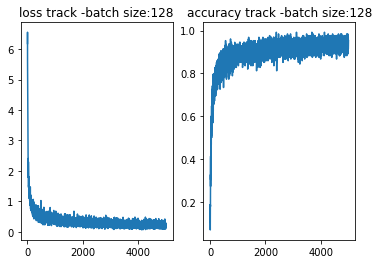

In [43]:
tf_NN(batch_size=128)


step 0, Accuracy= 0.090
step 1000, Accuracy= 0.848
step 2000, Accuracy= 0.887
step 3000, Accuracy= 0.934
step 4000, Accuracy= 0.918
Training finished!
Testing ACcuracy: 0.9333
...running time 53.0 seconds ...


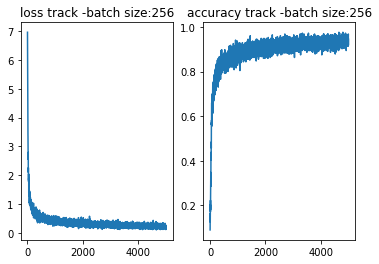

In [44]:
tf_NN(batch_size=256)

step 0, Accuracy= 0.131
step 1000, Accuracy= 0.886
step 2000, Accuracy= 0.902
step 3000, Accuracy= 0.935
step 4000, Accuracy= 0.923
Training finished!
Testing ACcuracy: 0.929
...running time 191.0 seconds ...


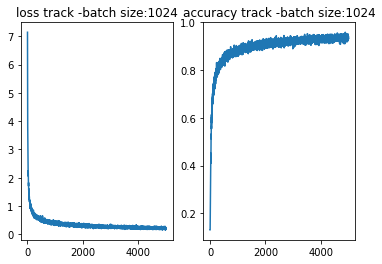

In [45]:
tf_NN(batch_size=1024)

## Finding and Comparison 

1. Large (but not too large like 1024) batch size can give better prediction accuracy and low testing loss; however, the training time is longer. 
2. Comparison with respect to the same iteration runs, Adam can reach better prediction accuracy particularly on small batch size. The running time benefit with the same itertations in my experiment is not quite obvious. 
3. Tensorflow does much better in its optimizer and the computing process than my NN with faster time and better accuracy.